# 로지스틱 회귀

In [59]:
import pandas as pandas
import matplotlib.pyplot as pyplot

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

cancer = load_breast_cancer()

In [60]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# 스케일링 

scaler = StandardScaler()
data_scaled = scaler.fit_transform(cancer.data)

x_train, x_test, y_train, y_test = train_test_split(data_scaled, cancer.target, test_size=0.3, random_state=0)

In [61]:
from sklearn.metrics import accuracy_score, roc_auc_score

# 로지스틱 회귀를 이용하여 학습 및 예측 수행 
# solver 인자값을 생성자로 입력하지 않으면 solver = 'lbfgs'

lr_clf = LogisticRegression()
lr_clf.fit(x_train, y_train)
lr_pred = lr_clf.predict(x_test)
lr_pred_proba = lr_clf.predict_proba(x_test)[:,1]

# accuracy와 roc_auc 측정 
print('accuracy : {0:.3f}, roc_auc : {1:.3f}'.format(accuracy_score(y_test, lr_pred), roc_auc_score(y_test, lr_pred_proba)))

accuracy : 0.977, roc_auc : 0.995


In [62]:
lr_clf.predict_proba(x_test)

array([[9.98645694e-01, 1.35430649e-03],
       [3.84282175e-02, 9.61571783e-01],
       [1.30562858e-03, 9.98694371e-01],
       [1.03849030e-02, 9.89615097e-01],
       [2.45997949e-04, 9.99754002e-01],
       [5.90660606e-03, 9.94093394e-01],
       [1.53858124e-04, 9.99846142e-01],
       [1.66513655e-03, 9.98334863e-01],
       [8.61333455e-05, 9.99913867e-01],
       [2.37564216e-06, 9.99997624e-01],
       [2.14530404e-01, 7.85469596e-01],
       [7.58383388e-02, 9.24161661e-01],
       [1.57971029e-05, 9.99984203e-01],
       [4.78248412e-01, 5.21751588e-01],
       [4.37381550e-01, 5.62618450e-01],
       [9.95842423e-01, 4.15757735e-03],
       [6.20911666e-03, 9.93790883e-01],
       [9.99995710e-01, 4.28969606e-06],
       [9.99900609e-01, 9.93913010e-05],
       [9.99999997e-01, 3.12772905e-09],
       [9.98584477e-01, 1.41552273e-03],
       [9.79628053e-01, 2.03719470e-02],
       [1.98566406e-02, 9.80143359e-01],
       [1.26199951e-03, 9.98738000e-01],
       [9.990851

In [63]:
solvers = ['lbfgs','liblinear','newton-cg','sag','saga']

# 여러개의 solver 값별로 로지스틱 회귀 학습 후 성능 평가
for solver in solvers:
    lr_clf = LogisticRegression(solver=solver, max_iter=600)
    lr_clf.fit(x_train, y_train)
    lr_pred = lr_clf.predict(x_test)
    lr_pred_proba = lr_clf.predict_proba(x_test)[:,1]

    print('solver : {0}, accuracy: {1:.3f}, roc_auc : {2:.3f}'. format(solver, accuracy_score(y_test, lr_pred), roc_auc_score(y_test, lr_pred_proba)))

solver : lbfgs, accuracy: 0.977, roc_auc : 0.995
solver : liblinear, accuracy: 0.982, roc_auc : 0.995
solver : newton-cg, accuracy: 0.977, roc_auc : 0.995
solver : sag, accuracy: 0.982, roc_auc : 0.995
solver : saga, accuracy: 0.982, roc_auc : 0.995


GridSearchCV 사용

In [64]:
from sklearn.model_selection import GridSearchCV

params = {'solver' : ['liblinear','lbfgs'], 
          'penalty' : ['l2','l1'],
          'C' : [0.01,0.1,1,5,10]}

lr_clf = LogisticRegression()

grid_clf = GridSearchCV(lr_clf, param_grid=params, scoring='accuracy', cv= 3)
grid_clf.fit(data_scaled, cancer.target)
print('최적 하이퍼 파리미터 : {0}, 최적 평균 정확도 : {1:.3f}'.format(grid_clf.best_params_, grid_clf.best_score_))

최적 하이퍼 파리미터 : {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}, 최적 평균 정확도 : 0.979


c:\Users\KDP-35\anaconda3\envs\ML_38\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
15 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\KDP-35\anaconda3\envs\ML_38\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\KDP-35\anaconda3\envs\ML_38\lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\KDP-35\anaconda3\envs\ML_38\lib\site-packages\sklearn\linear_model\_logistic.py", line 1168, in fit
    solver = _ch

solver 가 lbfgs일 때 l1 규제를 지원하지 않음에도 GridSearhCV에서 l1을 입력해서 나오는 메시지

# 자전거 대여 수요 예측

In [65]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

bike_df = pd.read_csv('../DATA/bike_train.csv')
print(bike_df.shape)
bike_df.head()


(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [66]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [67]:
bike_df['datetime'] = bike_df.datetime.apply(pd.to_datetime)

bike_df['year'] = bike_df.datetime.apply(lambda x : x.year)
bike_df['month'] = bike_df.datetime.apply(lambda x : x.month)
bike_df['day'] = bike_df.datetime.apply(lambda x: x.day)
bike_df['hour'] = bike_df.datetime.apply(lambda x:x.hour)
bike_df.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2


In [68]:
drop_columns = ['datetime','casual','registered']
bike_df.drop(drop_columns, axis = 1, inplace = True)

In [69]:
bike_df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0,16,2011,1,1,0
1,1,0,0,1,9.02,13.635,80,0.0,40,2011,1,1,1
2,1,0,0,1,9.02,13.635,80,0.0,32,2011,1,1,2
3,1,0,0,1,9.84,14.395,75,0.0,13,2011,1,1,3
4,1,0,0,1,9.84,14.395,75,0.0,1,2011,1,1,4


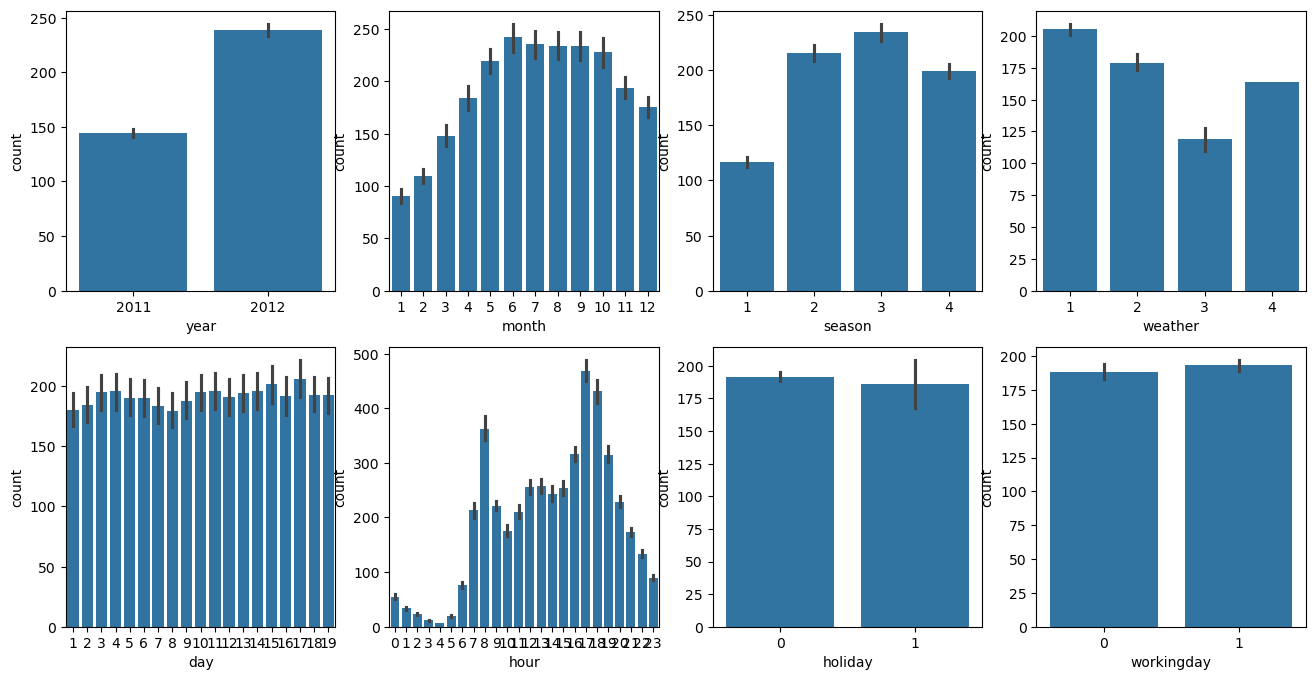

In [70]:
fig, axs = plt.subplots(figsize = (16,8), ncols = 4, nrows =2 )
cat_features = ['year','month','season','weather','day','hour','holiday','workingday'] # 다 명목형 
# cat_features에 있는 모든 칼럼별로 개별 칼럼값에 따른 count의 합을 barplot으로 시각화

for i, feature in enumerate(cat_features):
    row = int(i/4)
    col = i%4

    sns.barplot(x=feature, y='count', data=bike_df, ax = axs[row][col])

In [71]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# log 값 변환 시 NAN 등의 이슈로 log()가 아닌 log1p()를 이용해 RMSLE 계산 

def rmsle(y,pred):
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y - log_pred) ** 2
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle

# 사이킷런의 mean_square_error()를 이용해 RMSE 계산 
def rmse(y,pred):
    return np.sqrt(mean_squared_error(y,pred))

# MAE, RMSE, RMSLE를 모두 계산 
def evaluate_regr(y,pred):
    rmsle_val = rmsle(y,pred)
    rmse_val = rmse(y,pred)
    # MAE는 사이킷런의 mean_absolute_error()로 계산
    mae_val = mean_absolute_error(y,pred)
    print('RMSLE : {0:.3f}, RMSE : {1:.3f}, MAE : {2:.3f}'.format(rmsle_val, rmse_val, mae_val))

## 예측

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso

y_target = bike_df['count']
x_features = bike_df.drop(['count'], axis=1,inplace=False)

x_train, x_test, y_train, y_test = train_test_split(x_features, y_target, test_size=0.3, random_state=0)

lr_reg = LinearRegression()
lr_reg.fit(x_train, y_train)
pred = lr_reg.predict(x_test)

evaluate_regr(y_test, pred)

RMSLE : 1.165, RMSE : 140.900, MAE : 105.924


C:\Users\KDP-35\AppData\Local\Temp\ipykernel_7928\903354554.py:7: RuntimeWarning: invalid value encountered in log1p
  log_pred = np.log1p(pred)
